# Decision Tree - Diabetis dataset - Example 5 April 

In [1]:
import pandas as pd
import requests

In [2]:
df= pd.read_csv('diabetes.csv')

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## PREPROCESSING

### Handling missing values 

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#### conclusion : NO MISSING VALUES REPORTED 

### Handling Outliers

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

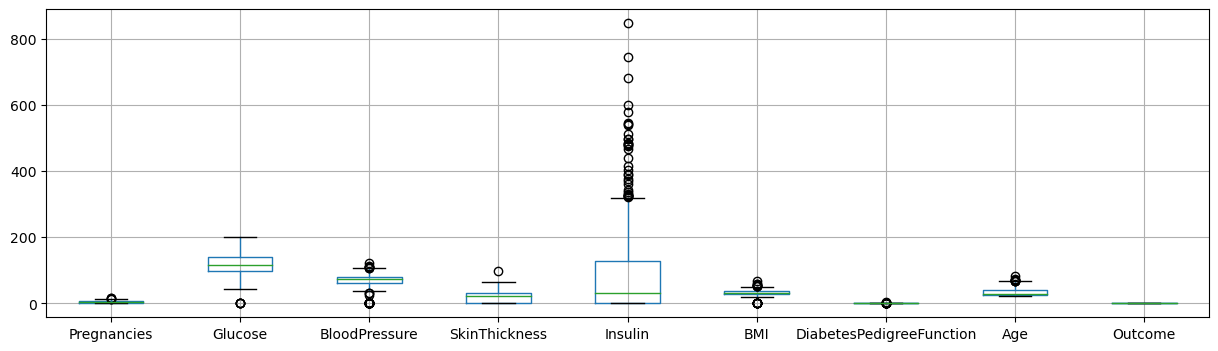

In [8]:
plt.figure(figsize = (15,4))
df.boxplot()

In [9]:
# Handling Outliers of Pregnancies 

df['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [10]:
Q1 = df['Pregnancies'].quantile(0.25)
Q3 = df['Pregnancies'].quantile(0.75)
IQR = Q3-Q1
Lower_Preg_lim = Q1 - 1.5*IQR
Upper_Preg_lim = Q1 + 1.5*IQR

In [11]:
df[df['Pregnancies']<Lower_Preg_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [12]:
df[df['Pregnancies']>Upper_Preg_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
11,10,168,74,0,0,38.0,0.537,34,1
12,10,139,80,0,0,27.1,1.441,57,0
23,9,119,80,35,0,29.0,0.263,29,1
24,11,143,94,33,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...,...,...
744,13,153,88,37,140,40.6,1.174,39,0
745,12,100,84,33,105,30.0,0.488,46,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0


In [13]:
## Conclusion : 86 items are has higher values copare to predicted 

In [14]:
df['Pregnancies'] = df['Pregnancies'].apply(lambda x : Upper_Preg_lim if x > Upper_Preg_lim else x)

In [15]:
df[df['Pregnancies']>Upper_Preg_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot: >

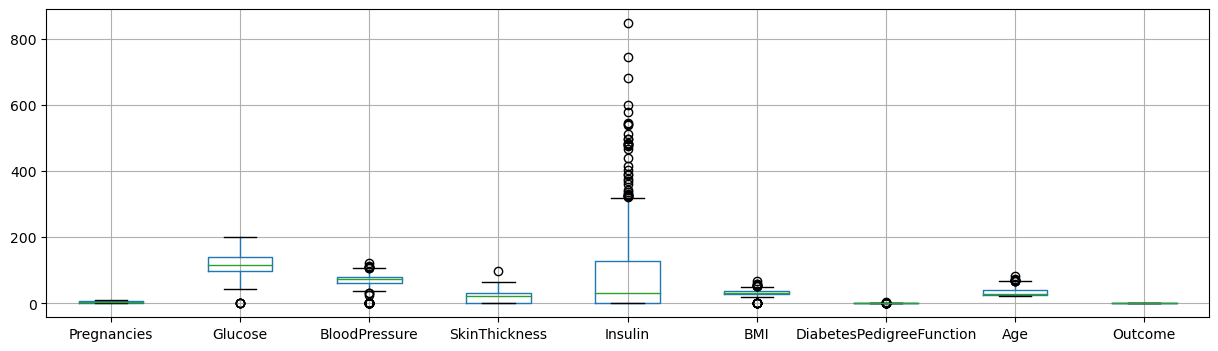

In [16]:
## After Retuned Pregnancies Data 

plt.figure(figsize = (15,4))
df.boxplot()

In [17]:
# Handling Outliers of Glucose

In [18]:
df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [19]:
Q1 = df['Glucose'].quantile(0.25)
Q3 = df['Glucose'].quantile(0.75)
IQR = Q3-Q1
Lower_Gluc_lim = Q1 - 1.5*IQR
Upper_Gluc_lim = Q1 + 1.5*IQR

In [20]:
df[df['Glucose']<Lower_Gluc_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0,48,20,0,24.7,0.140,22,0
182,1.0,0,74,20,23,27.7,0.299,21,0
342,1.0,0,68,35,0,32.0,0.389,22,0
349,5.0,0,80,32,0,41.0,0.346,37,1
502,6.0,0,68,41,0,39.0,0.727,41,1


In [21]:
## 91 outliers in GLucose - Low

In [22]:
df[df['Glucose']>Upper_Gluc_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8.0,183,64,0,0,23.3,0.672,32,1
8,2.0,197,70,45,543,30.5,0.158,53,1
11,8.5,168,74,0,0,38.0,0.537,34,1
13,1.0,189,60,23,846,30.1,0.398,59,1
14,5.0,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
748,3.0,187,70,22,200,36.4,0.408,36,1
749,6.0,162,62,0,0,24.3,0.178,50,1
753,0.0,181,88,44,510,43.3,0.222,26,1
759,6.0,190,92,0,0,35.5,0.278,66,1


In [23]:
## 99 outliers in GLucose - Low

In [24]:
# Set the values to a range

df['Glucose'] = df['Glucose'].apply(lambda x : Upper_Gluc_lim if x > Upper_Gluc_lim else x)
df['Glucose'] = df['Glucose'].apply(lambda x : Lower_Gluc_lim if x < Lower_Gluc_lim else x)

<AxesSubplot: >

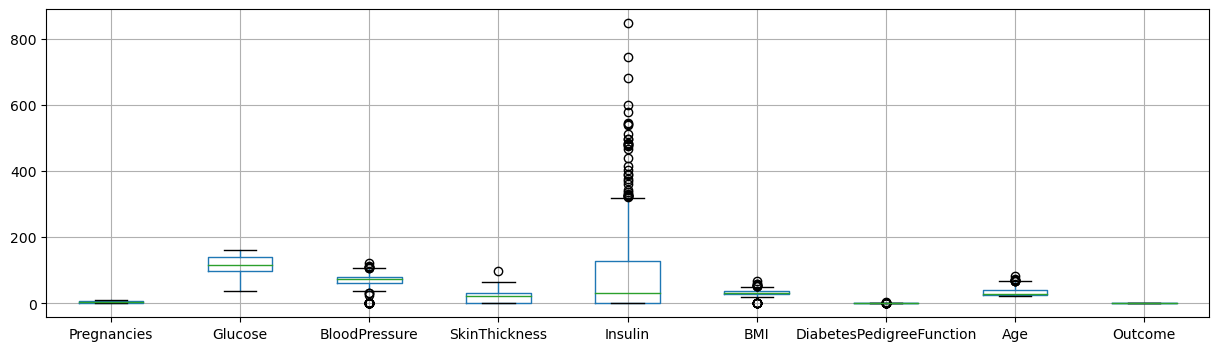

In [25]:
## After Retuned Glucose Parameter

plt.figure(figsize = (15,4))
df.boxplot()

In [26]:
df['Glucose'].describe()

count    768.000000
mean     118.901042
std       27.110742
min       37.125000
25%       99.000000
50%      117.000000
75%      140.250000
max      160.875000
Name: Glucose, dtype: float64

<AxesSubplot: >

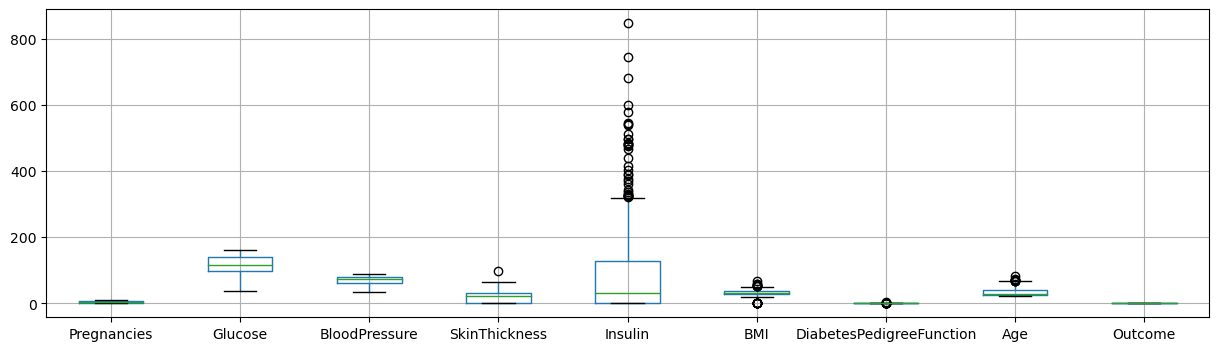

In [27]:
# Handling Outliers of Blood Pressure

Q1 = df['BloodPressure'].quantile(0.25)
Q3 = df['BloodPressure'].quantile(0.75)
IQR = Q3-Q1
Lower_bp_lim = Q1 - 1.5*IQR
Upper_bp_lim = Q1 + 1.5*IQR

df['BloodPressure'] = df['BloodPressure'].apply(lambda x : Upper_bp_lim if x > Upper_bp_lim else x)
df['BloodPressure'] = df['BloodPressure'].apply(lambda x : Lower_bp_lim if x < Lower_bp_lim else x)

plt.figure(figsize = (15,4))
df.boxplot()

<AxesSubplot: >

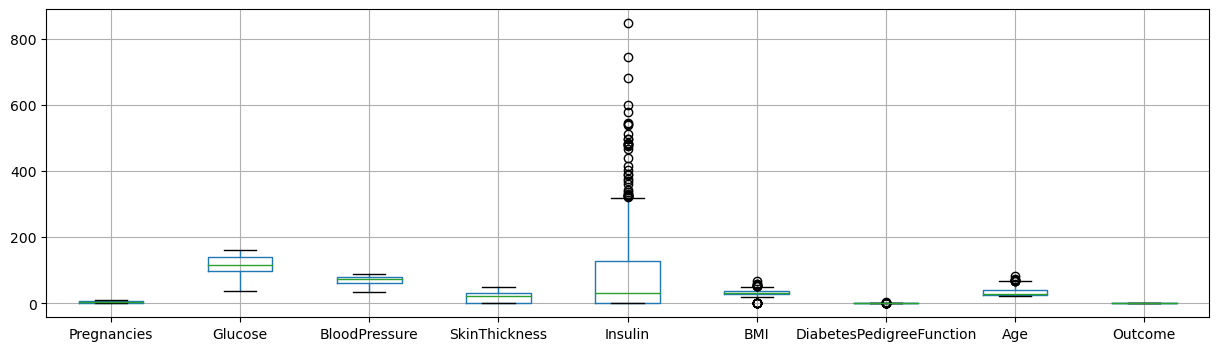

In [28]:
# Handling Outliers of Skin Thickness

Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3-Q1
Lower_st_lim = Q1 - 1.5*IQR
Upper_st_lim = Q1 + 1.5*IQR

df['SkinThickness'] = df['SkinThickness'].apply(lambda x : Upper_st_lim if x > Upper_st_lim else x)
df['SkinThickness'] = df['SkinThickness'].apply(lambda x : Lower_st_lim if x < Lower_st_lim else x)

plt.figure(figsize = (15,4))
df.boxplot()

In [29]:
# Handling Outliers of BMI

Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3-Q1
Lower_bmi_lim = Q1 - 1.5*IQR
Upper_bmi_lim = Q1 + 1.5*IQR

In [30]:
df[df['BMI']<Lower_bmi_lim].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [31]:
df[df['BMI']>Upper_bmi_lim].count()

Pregnancies                 81
Glucose                     81
BloodPressure               81
SkinThickness               81
Insulin                     81
BMI                         81
DiabetesPedigreeFunction    81
Age                         81
Outcome                     81
dtype: int64

<AxesSubplot: >

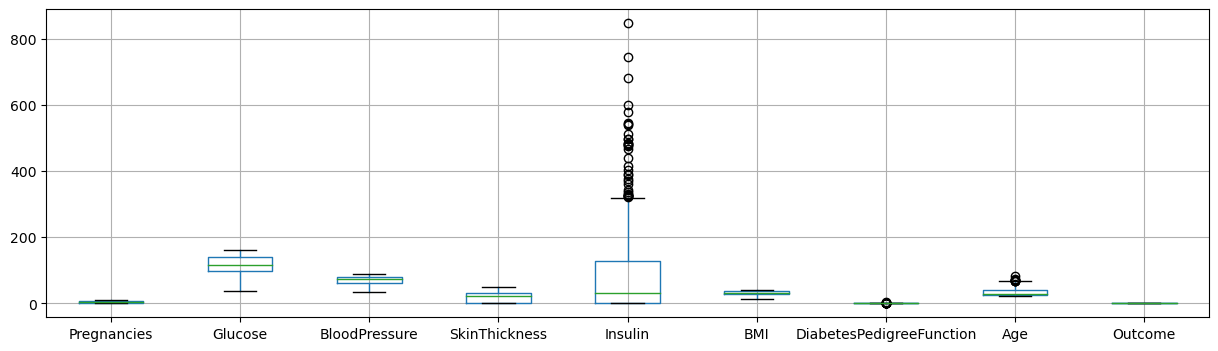

In [32]:
df['BMI'] = df['BMI'].apply(lambda x : Upper_bmi_lim if x > Upper_bmi_lim else x)
df['BMI'] = df['BMI'].apply(lambda x : Lower_bmi_lim if x < Lower_bmi_lim else x)

plt.figure(figsize = (15,4))
df.boxplot()

In [33]:
df[df['BMI']<Lower_bmi_lim].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
# Handling Outliers of Diabetes Pedigree function

Q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
Q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
IQR = Q3-Q1
Lower_dia_lim = Q1 - 1.5*IQR
Upper_dia_lim = Q1 + 1.5*IQR

In [35]:
df[df['DiabetesPedigreeFunction']<Lower_dia_lim].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df[df['DiabetesPedigreeFunction']>Upper_dia_lim].count()

Pregnancies                 97
Glucose                     97
BloodPressure               97
SkinThickness               97
Insulin                     97
BMI                         97
DiabetesPedigreeFunction    97
Age                         97
Outcome                     97
dtype: int64

In [37]:
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].apply(lambda x : Upper_dia_lim if x > Upper_dia_lim else x)

<AxesSubplot: >

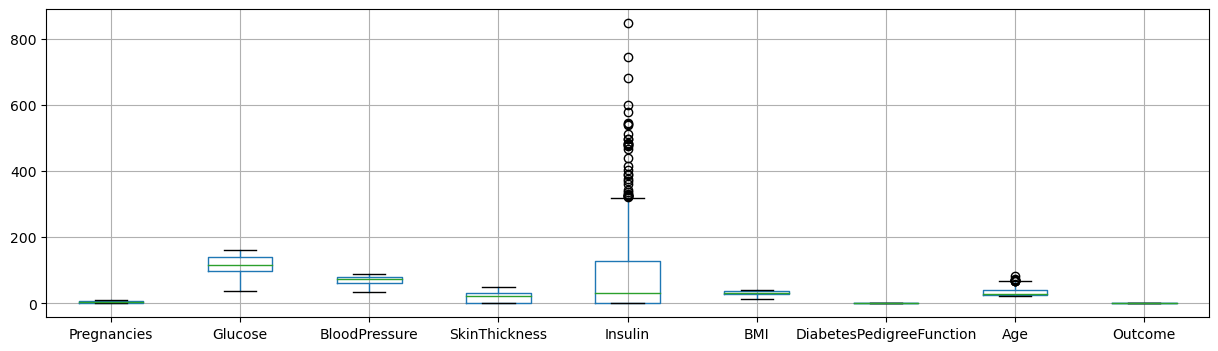

In [38]:
plt.figure(figsize = (15,4))
df.boxplot()

In [39]:
# Handling Outliers of Age

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1
Lower_age_lim = Q1 - 1.5*IQR
Upper_age_lim = Q1 + 1.5*IQR

In [40]:
df[df['Age']<Lower_age_lim].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
df[df['Age']>Upper_age_lim].Outcome.value_counts()

0    46
1    43
Name: Outcome, dtype: int64

In [42]:
## Conclusion : We are not handling Age

In [43]:
## Handling Insulin Outliers

df['Insulin'].describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [44]:
Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3-Q1
Lower_insulin_lim = Q1 - 1.5*IQR
Upper_insulin_lim = Q1 + 1.5*IQR

In [45]:
df[df['Insulin']<Lower_insulin_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [46]:
df[df['Insulin']>Upper_insulin_lim].Outcome.value_counts()

1    51
0    46
Name: Outcome, dtype: int64

In [47]:
df_copy = df

In [48]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.000,72.0,35.0,0,33.60,0.6270,50,1
1,1.0,85.000,66.0,29.0,0,26.60,0.3510,31,0
2,8.0,160.875,64.0,0.0,0,23.30,0.6720,32,1
3,1.0,89.000,66.0,23.0,94,28.10,0.1670,21,0
4,0.0,137.000,40.0,35.0,168,41.25,0.8175,33,1


<AxesSubplot: >

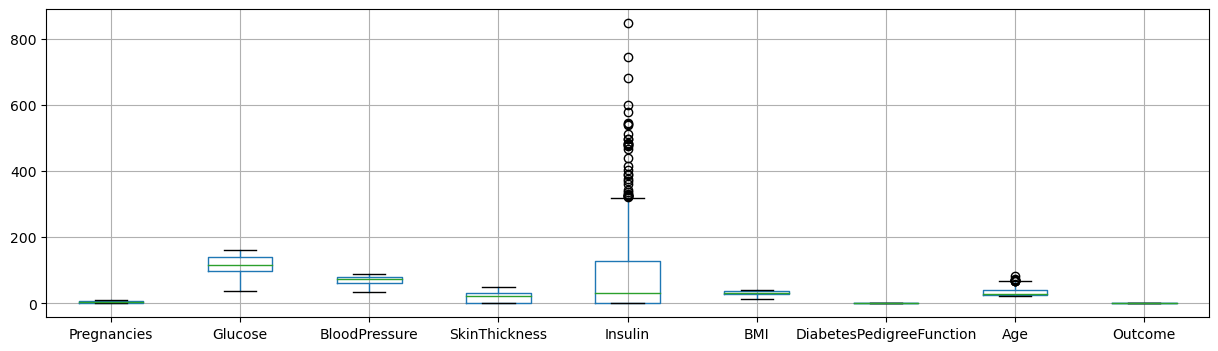

In [49]:
plt.figure(figsize = (15,4))
df_copy.boxplot()

In [50]:
df = df.drop(index=[row for row in df.index if Upper_insulin_lim < df.loc[row, 'Insulin']])

<AxesSubplot: >

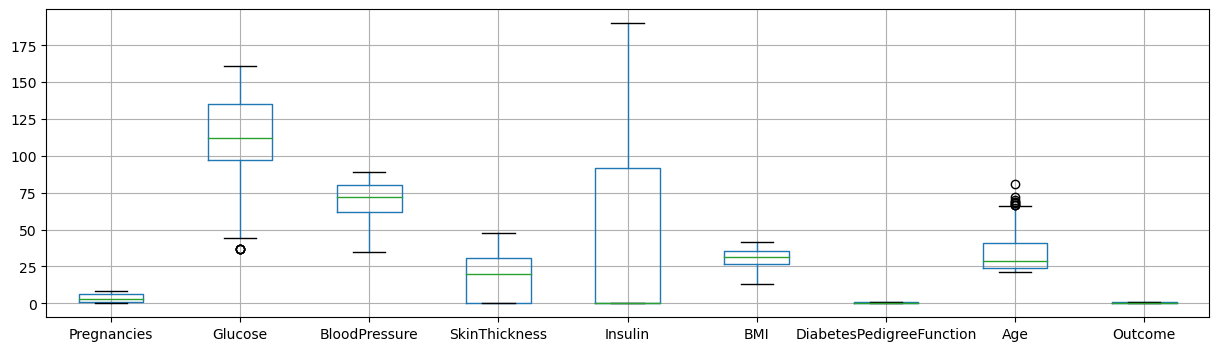

In [51]:
plt.figure(figsize = (15,4))
df.boxplot()

In [52]:
df[df['Glucose']<Lower_Gluc_lim]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


<AxesSubplot: >

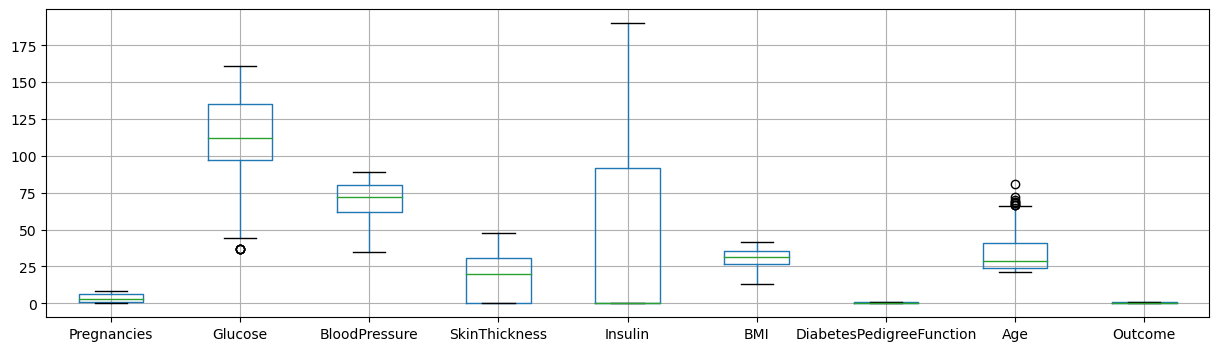

In [53]:
plt.figure(figsize = (15,4))
df.boxplot()

## Split into Dependent and Independent valirable

In [54]:
X = df.iloc[:, :-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.000,72.0,35.0,0,33.60,0.6270,50
1,1.0,85.000,66.0,29.0,0,26.60,0.3510,31
2,8.0,160.875,64.0,0.0,0,23.30,0.6720,32
3,1.0,89.000,66.0,23.0,94,28.10,0.1670,21
4,0.0,137.000,40.0,35.0,168,41.25,0.8175,33
...,...,...,...,...,...,...,...,...
763,8.5,101.000,76.0,48.0,180,32.90,0.1710,63
764,2.0,122.000,70.0,27.0,0,36.80,0.3400,27
765,5.0,121.000,72.0,23.0,112,26.20,0.2450,30
766,1.0,126.000,60.0,0.0,0,30.10,0.3490,47


In [55]:
y = df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 671, dtype: int64

## Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 50)

## Regression 

In [58]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(max_depth=4)
treeclassifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5, 0.9, 'x[1] <= 124.5\ngini = 0.426\nsamples = 621\nvalue = [430, 191]'),
 Text(0.25, 0.7, 'x[7] <= 29.5\ngini = 0.269\nsamples = 400\nvalue = [336, 64]'),
 Text(0.125, 0.5, 'x[0] <= 6.5\ngini = 0.157\nsamples = 244\nvalue = [223, 21]'),
 Text(0.0625, 0.3, 'x[5] <= 30.95\ngini = 0.139\nsamples = 239\nvalue = [221, 18]'),
 Text(0.03125, 0.1, 'gini = 0.015\nsamples = 133\nvalue = [132, 1]'),
 Text(0.09375, 0.1, 'gini = 0.269\nsamples = 106\nvalue = [89, 17]'),
 Text(0.1875, 0.3, 'x[2] <= 47.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.21875, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.5, 'x[5] <= 26.95\ngini = 0.399\nsamples = 156\nvalue = [113, 43]'),
 Text(0.3125, 0.3, 'x[5] <= 16.325\ngini = 0.051\nsamples = 38\nvalue = [37, 1]'),
 Text(0.28125, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.34375, 0.1, 'gini = 0.0\nsamples = 37\nvalue = [37, 0]'),
 Text(0.4375, 0.3, 'x[1] 

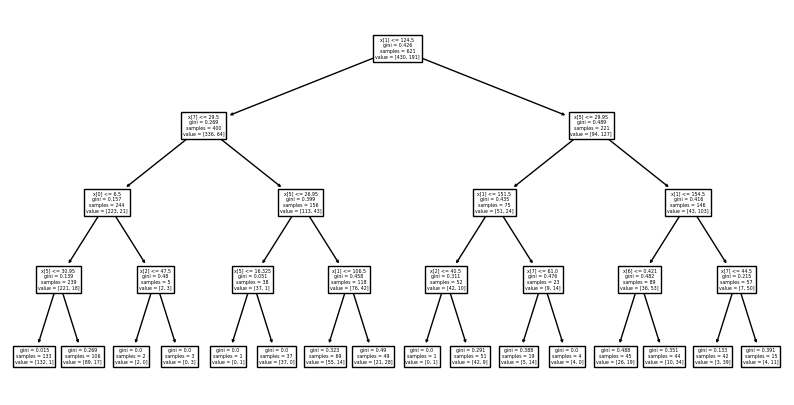

In [59]:
from sklearn import tree
plt.figure(figsize = (10,5))
tree.plot_tree(treeclassifier)

In [62]:
y_pred = treeclassifier.predict(X_test)

In [65]:
## Score - Before HYPERPARAMETER Tuning 

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.62

## Cross Validation and Hyperparameter Tuning 

In [90]:
from sklearn.tree import DecisionTreeClassifier

parameter={
 'criterion':['gini','entropy', 'log_loss'],
  'splitter':['best','random'],
  'max_features':['auto', 'sqrt', 'log2']
    
}
classifier=DecisionTreeClassifier()

In [91]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
classifier=GridSearchCV(classifier, param_grid=parameter, cv =5, scoring='accuracy')

In [92]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [94]:
# Check Best parameters 
classifier.best_params_

{'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}

In [95]:
y_pred2 = classifier.predict(X_test)

In [96]:
y_pred2

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1])

In [98]:
## Score after Hyperparameter Tuning
from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_pred2, y_test)
score2

0.62

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred2, y_test)

array([[19, 14],
       [ 5, 12]])